# Project Part 2 - Predicting Default Using Bayes and SVM's

## Exercise 1. First import the cleaned data set with variable encodings from Part 1. Look at the first 10 examples, get the data frame information to recheck the variable types and counts.

In [1]:

import pandas as pd
clean_data = pd.read_csv('cleaned_data.csv')
clean_data.head(10)

SyntaxError: invalid syntax (911181282.py, line 1)

In [3]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

## Exercise 2. Now we investigate the dependence of our target variable 'default payment next month' on the rest of the variables. Import the numpy and matplotlib.pyplot packages as in the first input below. (a) The next example input shows how to use the scatter(x, y) method in pyplot to create a simple scattergram for the continuous predictor 'LIMIT_BAL', labeling the axes and giving the plot a title. Do the same for the other continuous predictors, and identify any phenomena you see that might have impact on whether that predictor could be useful. (b) The third example input illustrates how the crosstab() method from the pandas package can give a cross-tabulation of the number of examples in the frame that have the possible joint values of a categorical predictor feature 'SEX' and our target feature. The options give marginal totals, and furthermore, the normalize option can be used to give row percentages. Repeat these commands for the other categorical predictors. In each case, produce the proportions of defaults among the predictor categories as shown in the fourth example input. Which categories produce the highest percentage of defaults?

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
continuous_predictors = {0:'LIMIT_BAL',1:'AGE',2:'BILL_AMT1',3:'BILL_AMT2',4:'BILL_AMT3',5:'BILL_AMT4',
                         6:'BILL_AMT5',7:'BILL_AMT6',8:'PAY_AMT1',9:'PAY_AMT2',10:'PAY_AMT3',11:'PAY_AMT4',
                         12:'PAY_AMT5',13:'PAY_AMT6'}
num_plot= len(continuous_predictors)

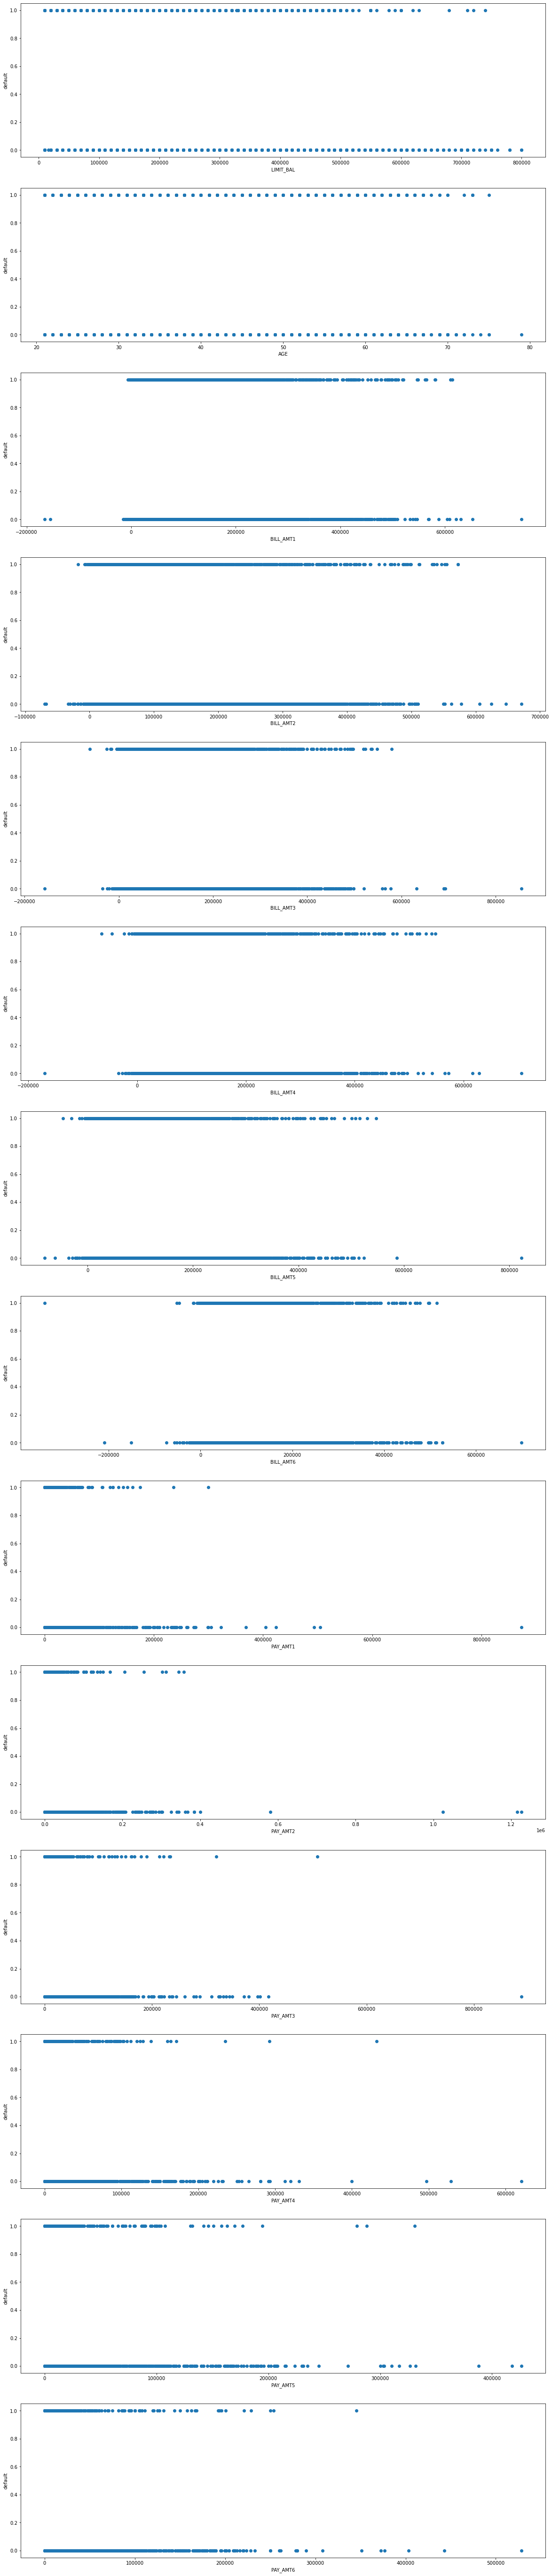

In [6]:
fig, ax = plt.subplots(num_plot, figsize=(20, 100))
for i, j in continuous_predictors.items():
    ax[i].scatter(clean_data[j], clean_data['default payment next month'])
    ax[i].set_xlabel(j)
    ax[i].set_ylabel('default')
    
plt.show()

**Q2:** (a) From the graph, I didn't see any strong dependence between the ```'default payment next month'``` and ```'LIMIT_BAL'``` ,or ```'AGE'```,or ```'BILL_AMT'```. However, for the variable ```'PAT_AMT'```, I see when a value is at the low value range(for example, 0 ~ 200000 in 'PAT_AMT 1' and 0 ~ 0.2 in 'PAT_AMT 2'), it is more likely that the ```'default payment next month'``` is going to be 0. 

In [23]:
discontinuous_predictors = {0:'SEX',1:'EDUCATION',2:'MARRIAGE',3:'PAY_1',4:'PAY_2',5:'PAY_3',6:'PAY_4',
                           7:'PAY_5',8:'PAY_6'}

In [25]:
for i, j in discontinuous_predictors.items():
    print(pd.crosstab(clean_data[j],clean_data['default payment next month'],margins=True, margins_name="Total"))
    print(pd.crosstab(clean_data[j],clean_data['default payment next month'],normalize = 'index'))

default payment next month      0     1  Total
SEX                                           
1                            8020  2564  10584
2                           12730  3350  16080
Total                       20750  5914  26664
default payment next month         0         1
SEX                                           
1                           0.757748  0.242252
2                           0.791667  0.208333
default payment next month      0     1  Total
EDUCATION                                     
1                            7587  1825   9412
2                            9519  2939  12458
3                            3261  1119   4380
4                             383    31    414
Total                       20750  5914  26664
default payment next month         0         1
EDUCATION                                     
1                           0.806099  0.193901
2                           0.764087  0.235913
3                           0.744521  0.255479
4            

default payment next month         0         1
PAY_6                                         
-2                          0.801878  0.198122
-1                          0.826975  0.173025
 0                          0.811876  0.188124
 2                          0.489095  0.510905
 3                          0.358974  0.641026
 4                          0.348837  0.651163
 5                          0.400000  0.600000
 6                          0.266667  0.733333
 7                          0.142857  0.857143
 8                          0.000000  1.000000


 **Q2:** (b) Given the defaults, the highest percentage of each categorical predictors are ```'SEX' = 1``` (0.24), ```'EDUCATION' = 3```(0.26), ```'MARRIAGE' = 3```(0.24), ```'PAY_1' = 7```(0.78), ```'PAT_2' = 6```(0.63), ```'PAY_3' = 7```(0.83), ```'PAY_4' = 7```(0.86),```'PAY_5' = 6```(1.00),```'PAY_6'= 8```(1.00).

## Exercise 3. Now let's try to form a Bayesian model. The code below picks out the SEX, MARRIAGE, EDUCATION_CAT, and PAY_1 variables to put into a new dataframe X, and grabs the target variable 'default payment next month' for the full set of Y values. Take a look at the first 10 examples in these two data frames. Prepare the string-valued EDUCATION_CAT variable for use by converting it back to the numerical codes that were originally given in the data set (1 = graduate school; 2 = university; 3 = high school; 4 = others). Use the to_numpy method on the two frames as shown to convert them to array form. Then use the train_test_split function to split the data into training and testing sets with 80% as training and 20% as testing. Carry out the BernoulliNB fit and accuracy stats. What do you get? Produce a confusion matrix and classification report and discuss how well you succeeded in identifying defaults in the test data set. What modifications might be in order for your final project?

In [26]:
X_features = clean_data.copy()
X = X_features[['SEX','MARRIAGE','EDUCATION_CAT','PAY_1']].copy()
Y = X_features[['default payment next month']].copy()

In [27]:
X.head(10)

,SEX,MARRIAGE,EDUCATION_CAT,PAY_1
0,2,1,university,2
1,2,2,university,-1
2,2,2,university,0
3,2,1,university,0
4,1,1,university,-1
5,1,2,graduate school,0
6,1,2,graduate school,0
7,2,2,university,0
8,2,1,high school,0
9,1,2,high school,-2


In [28]:
Y.head(10)

,default payment next month
0,1
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [29]:
cat_mapping2 = {'graduate school':1,'university':2,'high school':3,'others':4}
X['ED']=X['EDUCATION_CAT'].map(cat_mapping2)
X.head(10)

,SEX,MARRIAGE,EDUCATION_CAT,PAY_1,ED
0,2,1,university,2,2
1,2,2,university,-1,2
2,2,2,university,0,2
3,2,1,university,0,2
4,1,1,university,-1,2
5,1,2,graduate school,0,1
6,1,2,graduate school,0,1
7,2,2,university,0,2
8,2,1,high school,0,3
9,1,2,high school,-2,3


In [30]:
Xnew = X[['SEX','MARRIAGE','ED','PAY_1']].copy()

In [31]:
X_arr = Xnew.to_numpy()
type(X_arr)

numpy.ndarray

In [32]:
Y_arr = Y.to_numpy()
type(Y_arr)

numpy.ndarray

In [33]:
X_arr.shape

(26664, 4)

In [34]:
Y_arr.shape

(26664, 1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size=0.2, random_state=42)

In [37]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=1.0, fit_prior=True)
clf = clf.fit(X_train, Y_train)

prediction = clf.predict(X_test)
accuracy = clf.score(X_test, Y_test)
print(accuracy)

0.7834239639977498


C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction,labels=[0,1]))

[[3590  593]
 [ 562  588]]


**Q3:** From the confusion matrix, we have a high true negative rate that means we are good at predicting non-default id. However, as a company we should focus more on true positive rate which can give us a warning of who might default payment next month. More importantly, we need to lower the Type II error which is the false negative because we don't want too many customers that we think they are non-default but it turns out they all default payment next month.

## Exercise 4. In the next part of this project we try to create an SVM model from numerical variables to see if it succeeds better. First, which variables in the full data set are eligible for us to use?

**Q4:** From all these numerical variables, we are looking for the continuous variables such as ```LIMIT_BAL```, ```AGE```, and ```PAY_AMT```.

## Exercise 5. As a first step toward a more detailed analysis, let's pick the LIMIT_BAL, AGE, and PAY_AMT1 variables as our predicting features. The target vector Y_arr is already defined. Then, because two of these predictors are on a different scale than the other, it is a good idea to standardize all of them. Do so, and create a feature array XSVM with the standardized values to use as the predictor. (Note: look up the scale() method on the web and import it from the proper package in order to make standardization easy) Check the first 10 entries of your new feature.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scale = StandardScaler()
X = X_features[['LIMIT_BAL', 'AGE','PAY_AMT1']].copy()
X_arr = scale.fit_transform(X)
X_arr.shape

(26664, 3)

In [67]:
print(X_arr[:10])

[[-1.13926719 -1.24687093 -0.34158073]
 [-0.36907082 -1.03012206 -0.34158073]
 [-0.60012973 -0.16312661 -0.25067755]
 [-0.90820828  0.16199669 -0.22181369]
 [-0.90820828  2.32948533 -0.22181369]
 [-0.90820828  0.16199669 -0.19187193]
 [ 2.55767538 -0.70499877  2.95201281]
 [-0.52311009 -1.35524536 -0.31882499]
 [-0.21503155 -0.8133732  -0.14222849]
 [-1.13926719 -0.05475217 -0.34158073]]


In [70]:
Y = X_features[['default payment next month']].copy()
Y_arr = Y.to_numpy()
Y_arr.shape

(26664, 1)

## Exercise 6. Carry out one SVM model and assess its success with a linear kernel and penalty constant C = 1. Then tune the model as in Lab 3 with several values of C, the two kernels (linear and radial basis), and several values of gamma. Apply SVM to the best hyperparameter set and see if you achieve better results than in the basic model.

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size=0.2, random_state=42)

In [72]:
clf_basic = SVC(kernel = 'linear', C = 1, random_state = 42)
clf_basic = clf_basic.fit(X_train, Y_train)
basic_prediction = clf_basic.predict(X_test)
basic_accuracy = clf_basic.score(X_test, Y_test)
print(basic_accuracy)

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7843615225951622


In [52]:
clf = SVC(class_weight='balanced', random_state=36)

parameters = {'C': [0.1, 1, 10],
    'gamma': [1e-07, 1e-08, 1e-06],
    'kernel' : ['rbf', 'linear'] }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)

grid_search.fit(X_train, Y_train)
print('The best model:\n', grid_search.best_params_)

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best model:
 {'C': 0.1, 'gamma': 1e-07, 'kernel': 'rbf'}


In [53]:
clf_best = grid_search.best_estimator_
prediction = clf_best.predict(X_test)
accuracy = clf_best.score(X_test, Y_test)
print(accuracy)

0.7839864991561972


**Q5:** We see even we found the best hyperparmeters, we accuracy is still around the same as the basic model, which are all around 78%